In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import networkx as nx
import os
import sys
import json
import random
import numpy.random as npr
import re
from math import ceil, floor, log, log2, log10, sqrt, exp, factorial, gcd, lcm, pi, e, inf, nan, isinf, isnan, isfinite, copysign, fmod, frexp, ldexp, modf, trunc, erf, erfc, gamma, lgamma, hypot, atan2, pow, atan, asin, acos, tan, sin, cos, sinh, cosh, tanh, asinh, acosh, atanh, degrees, radians, expm1, log1p, exp2, log2, fsum, gcd, lcm, tau, inf, nan, isinf, isnan, isfinite, copysign, fmod, frexp, ldexp, modf, trunc, erf, erfc, gamma, lgamma, hypot, atan2, pow, atan, asin, acos, tan, sin, cos, sinh, cosh, tanh, asinh, acosh, atanh, degrees, radians, expm1, log1p, exp2, log2, fsum, gcd, lcm, tau, inf, nan, isinf, isnan, isfinite, copysign, fmod, frexp, ldexp, modf, trunc, erf, erfc, gamma, lgamma, hypot, atan2, pow, atan, asin, acos, tan, sin, cos, sinh, cosh, tanh, asinh, acosh, atanh, degrees, radians, expm1, log1p, exp2, log2, fsum, gcd, lcm, tau, inf, nan, isinf, isnan, isfinite, copysign, fmod, frexp, ldexp, modf, trunc, erf, erfc, gamma, lgamma, hypot, atan2, pow, atan, asin, acos, tan, sin, cos, sinh, cosh, tanh, asinh, acosh, atanh, degrees, radians, expm1, log1p, exp2, log2, fsum, gcd, lcm, tau, inf, nan, isinf, isnan, isfinite, copysign, fmod, frexp, ldexp, modf, trunc, erf, erfc, gamma, lgamma, hypot, atan2
from collections import Counter, defaultdict, OrderedDict, namedtuple, deque
from functools import partial, partialmethod, reduce, wraps, cache, lru_cache, cached_property, singledispatch, singledispatchmethod
from itertools import count, cycle, product as cartesian_product, permutations, combinations, combinations_with_replacement, accumulate, starmap
from tqdm import tqdm # from tqdm.notebook import tqdm
from uuid import uuid4
from datetime import datetime, timedelta
from time import time, sleep
from toolz import memoize, curry, diff, unique, valmap, valfilter, itemmap, itemfilter, keymap, keyfilter, merge_sorted, interleave, isdistinct, diff, peek, peekn, countby, juxt, excepts, merge, merge_with, assoc, dissoc
from more_itertools import unzip, chunked, chunked_even, minmax, filter_except, numeric_range, make_decorator,replace, locate,countable,unique_everseen, always_iterable,unique_justseen,map_except,count_cycle, mark_ends, sample, distribute, bucket, peekable, seekable,spy,transpose, sieve,polynomial_from_roots,flatten, intersperse, partition, powerset, collapse, split_at, flatten,split_before, split_after, split_when, take
import urllib.parse
import urllib
import unicodedata
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

import scipy.spatial.distance
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN

import requests as req
from bs4 import BeautifulSoup

sys.path.append(os.path.relpath("../../src/"))
from network_v3 import * # my classes and functions
from ipynb.fs.defs.population_distributions import *

In [2]:
with open('../data/google_api_key.txt', 'r') as f:
    api_key = f.read().strip()

In [3]:
sabi = pd.read_excel('../data/Sabi_Export_1.xlsx', sheet_name='Resultados')
sabi.drop(columns=['Unnamed: 0'], inplace=True)
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    encoding = "utf-8"
    return only_ascii.decode(encoding)

new_cols = [remove_accents(col.lower()).replace(r'ult. ano disp.','').rstrip().rstrip('%').rstrip().rstrip('eur').rstrip().replace(' ','_') for col in sabi.columns]
new_cols[-2] = 'liquidez general_(%)'
sabi.rename(columns=dict(zip(sabi.columns, new_cols)), inplace=True)
sabi = sabi.applymap(lambda s: s.lower() if type(s) == str else s)
sabi = sabi.drop(columns=['codigo_consolidacion','pais'])
sabi.head()

,nomb,codigo_nif,localidad,provincia,ultimo_ano_disponibl,numero_empleados,fondos_propios,total_activo,ingresos_de_explotacion,result._ordinarios_antes_impuestos,resultado_del_ejercicio,rentabilidad_economica_(%),rentabilidad_financiera_(%),endeudamiento_(%),liquidez general_(%),descripcion_actividad
0,larrasa animal genetics s.l.,b06709638,la albuera,badajoz,43830,n.d.,85501341.00,2.069643e+08,172106879,74906771,55498421,36.193,87.608,58.687,2.151,7500
1,spain animal health solutions sl. (extinguida),b88232186,madrid,madrid,43830,55,10623317.13,1.604611e+07,43247374.97,-15712993.17,-11779682.87,-97.924,-147.910,33.795,2.112,"actividades veterinarias, incluyendo, pero no ..."
2,laboratorio dr larrasa sl,b06366041,jerez de los caballeros,badajoz,43830,6,40191820.00,1.612184e+08,34825893,15346779,12025119,9.519,38.183,75.069,6.253,diagnostico clinico de enfermedades animales. ...
3,centre veterinari vic sl (extinguida),b59046326,masies de roda,barcelona,43100,23,118772.18,3.561298e+06,22057948.9,332106.79,249080.09,9.325,279.616,96.664,1.032,distribución de productos de veterinaria
4,kivet veterinaria slu,b88282868,alcorcon,madrid,44286,217,3601764.00,8.968872e+06,9526473,-4566828,-3385236,-50.918,-126.794,59.841,1.914,intermediacion en prestacion de servicios y ac...


In [4]:
info_dict = {}

for i in sabi.iterrows():
    info_dict[i[1]['codigo_nif']] = {'nombre': i[1]['nomb'], 'provincia': i[1]['provincia']}

In [5]:
def url_formatter(url, name, province ,api_key = api_key):
    name = name.replace('(extinguida)','')
    params = {'fields': 'formatted_address,name,geometry,rating,business_status,place_id,type',
          'input': f'{name},{province}',
          'inputtype': 'textquery',
          'key': api_key}
    return url + urllib.parse.urlencode(params)

def url_loader(url,nif):
    try:
        with urllib.request.urlopen(url) as response:
            data = json.loads(response.read())
            with open(f'../data/{nif}.json', 'w') as fp: # write clean file
                json.dump(data,fp)
            return print(f'File {nif}.json saved')
    except:
        return print(f'Error with {nif}')

In [6]:
url = 'https://maps.googleapis.com/maps/api/place/findplacefromtext/json?'
break # to avoid overloading the api
for nif, val in info_dict.items():
    open_url = url_formatter(url, val['nombre'], val['provincia'])
    print(open_url)
    url_loader(open_url, nif)
    sleep(1)

SyntaxError: 'break' outside loop (57399024.py, line 2)

In [ ]:
scrape = []
with os.scandir('../data/') as it:
    for entry in it:
        if entry.name.endswith(".json") and entry.is_file():
            with open(entry.path, 'r') as f:
                data = json.loads(f.read())
                data = pd.json_normalize(data['candidates'])
                data['nifs'] = entry.name.split('.')[0]
                scrape.append(data)
scrape = pd.concat(scrape)
scrape = scrape.drop(columns=['geometry.viewport.northeast.lat','geometry.viewport.northeast.lng','geometry.viewport.southwest.lat','geometry.viewport.southwest.lng'])

In [ ]:
scrape.head()

,business_status,formatted_address,name,place_id,rating,types,geometry.location.lat,geometry.location.lng,nifs
0,OPERATIONAL,"Av. Martín Palomino, 36, 10600 Plasencia, Cáce...",Veterinarios Exaga,ChIJD12laKYXPg0R8Vs3SZ8bzuc,4.5,"[doctor, health, point_of_interest, establishm...",40.014309,-6.106002,a10183705
0,OPERATIONAL,"Carrer Ramón y Cajal, 16, 12190 Borriol, Caste...",SELLOR S.A.,ChIJdz1PXBD_Xw0RlNMiMXki-ao,0.0,"[veterinary_care, point_of_interest, establish...",40.040861,-0.069635,a12216719
0,OPERATIONAL,"Avinguda de la Selva, 135, 17170 Amer, Girona,...",HIPRA,ChIJO9REBonQuhIRbzk7Fueej6M,3.8,"[veterinary_care, health, point_of_interest, e...",42.013782,2.598802,a17025727
0,OPERATIONAL,"Akaborro Ind., 0, 31860 Irurtzun, Navarre, España",Albaikide SA,ChIJdf-b1Pz1UA0R6dCnoUngyK4,4.0,"[veterinary_care, point_of_interest, establish...",42.922102,-1.832502,a31720329
0,OPERATIONAL,"Av. Pablo Iglesias, 73, 33204 Gijón, Asturias,...",Hospital Veterinario Asturias,ChIJ3RU6SYd8Ng0RAFG8_dmXl0k,4.6,"[veterinary_care, point_of_interest, establish...",43.535564,-5.651437,a33789157


In [ ]:
df = pd.merge(sabi, scrape, left_on='codigo_nif', right_on='nifs')

In [ ]:
df.dtypes

nomb                                   object
codigo_nif                             object
localidad                              object
provincia                              object
ultimo_ano_disponibl                    int64
numero_empleados                       object
fondos_propios                        float64
total_activo                          float64
ingresos_de_explotacion                object
result._ordinarios_antes_impuestos     object
resultado_del_ejercicio                object
rentabilidad_economica_(%)            float64
rentabilidad_financiera_(%)           float64
endeudamiento_(%)                     float64
liquidez general_(%)                   object
descripcion_actividad                  object
business_status                        object
formatted_address                      object
name                                   object
place_id                               object
rating                                float64
types                             

In [ ]:
df.numero_empleados = df.numero_empleados.apply(lambda x: int(x) if x != 'n.d.' else np.nan)
df.numero_empleados = df.numero_empleados.astype('Float64')

In [ ]:
df.rename(columns={'geometry.location.lat': 'lat', 'geometry.location.lng': 'lng'}, inplace=True)

In [ ]:
for i in df.select_dtypes(include=['object','category']).columns:
    df[i] = df[i].apply(lambda x: x.lower() if type(x) == str else x)
    df[i] = df[i].astype('str')

In [ ]:
df.to_parquet('../data/sabi.parquet')

In [7]:
df = pd.read_parquet('../data/sabi.parquet')

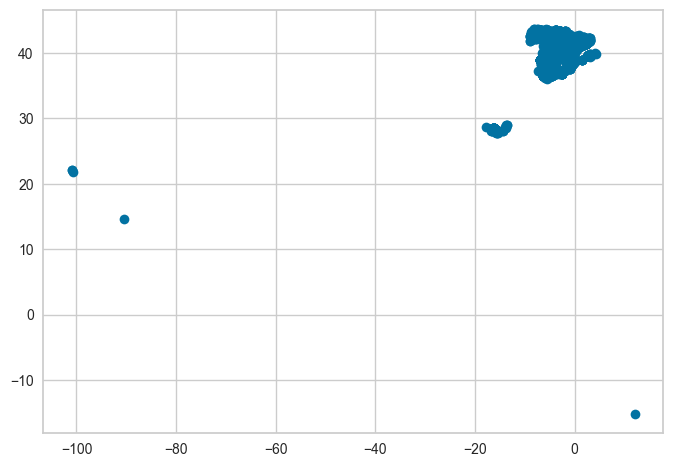

In [8]:
coords = df[['lng','lat']].values
coords
plt.plot(*zip(*coords), 'o')

In [9]:
def cluster_analysis(df, clusters = 5, draw = True,seed = 42):

    kmeans = KMeans(n_clusters=clusters, random_state=seed).fit(df)
    
    if draw:
        plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'hotpink', alpha = 1, label = 'Cluster Centers', s = 100)
        plt.legend()
        plt.plot();
    return kmeans.cluster_centers_, kmeans.labels_

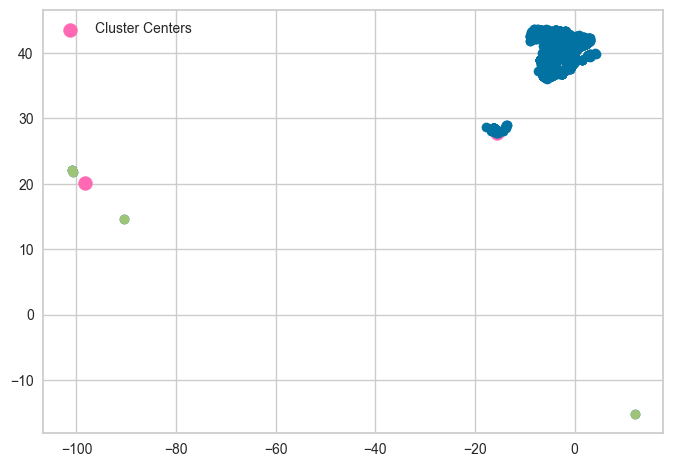

In [10]:
plt.plot(*zip(*coords), 'o')
cluster_analysis(coords,3)
modelo = DBSCAN(eps=2, min_samples=5)
modelo.fit(coords)
labels = list(zip(coords, modelo.labels_))
filtered = [i[0] for i in labels if i[1] == -1]
filtered_x, filtered_y = list(unzip(filtered)[0]), list(unzip(filtered)[1])
plt.plot(filtered_x, filtered_y, 'o') # DBSCAN works better

In [11]:
df['cluster'] = modelo.labels_
df = df.drop(index=df.cluster[df.cluster == -1].index)
df[df.cluster == 1]; # Canarias

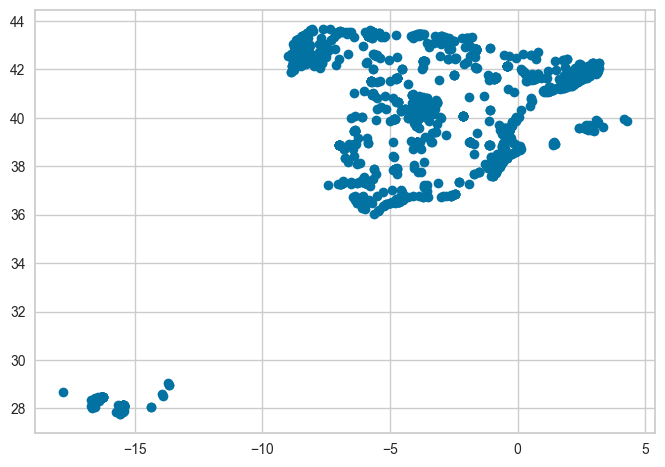

In [12]:
coords = df[['lng','lat']].values
coords
plt.plot(*zip(*coords), 'o')

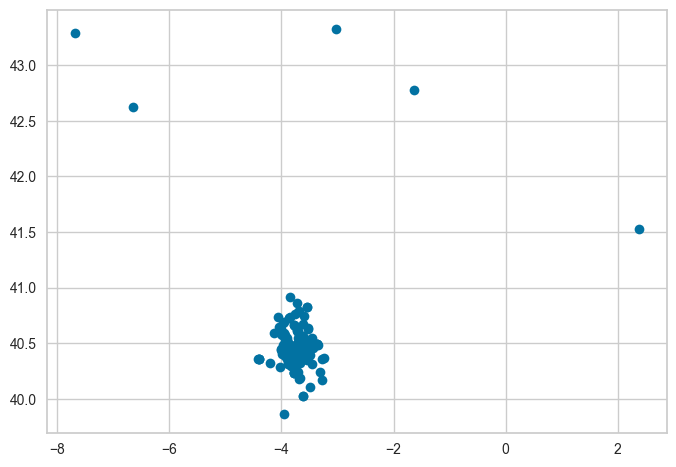

In [13]:
madrid_df = df[df.provincia == 'madrid']
madrid_coords = madrid_df[['lng','lat']].values
plt.plot(*zip(*madrid_coords), 'o')

In [14]:
modelo = DBSCAN(eps=0.5, min_samples=5)
modelo.fit(madrid_coords)
labels = list(zip(madrid_coords, modelo.labels_))
filtered = [i[0] for i in labels if i[1] == -1]
filtered_x, filtered_y = list(unzip(filtered)[0]), list(unzip(filtered)[1])

In [15]:
madrid_df['cluster'] = modelo.labels_
madrid_df = madrid_df.drop(index=madrid_df.cluster[madrid_df.cluster == -1].index)

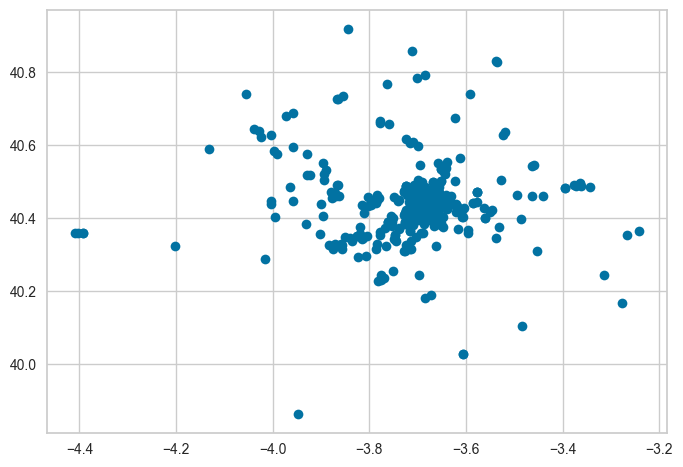

In [16]:
madrid_coords = madrid_df[['lng','lat']].values
plt.plot(*zip(*madrid_coords), 'o')

In [17]:
municipios = pd.read_csv('../data/municipios.csv', sep='\t')
municipios = municipios[municipios['PERIODO']==2022]
municipios = municipios[municipios['Variable3']=='Municipios']
municipios = municipios[municipios['Valor2']=='Total']
municipios = municipios.drop(columns=['PERIODO','Variable3','Valor2','Variable1','Valor1','Variable2','Variable4','Valor4'])
municipios.reset_index(drop=True, inplace=True)
municipios.rename(columns={'Valor3': 'municipio', 'VALOR':'poblacion'}, inplace=True)

In [18]:
import requests as req
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service as FirefoxService
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
from webdriver_manager.firefox import GeckoDriverManager

PATH=FirefoxService(GeckoDriverManager().install())
binary = FirefoxBinary(r'C:\Program Files\Mozilla Firefox\Firefox.exe')

opciones=Options()

[WDM] - Downloading: 16.9kB [00:00, 17.3MB/s]                   


In [ ]:
break
url = 'https://www.coordenadas.com.es/espana/pueblos-de-madrid/28/'

In [ ]:
driver = webdriver.Firefox(firefox_binary=binary,options = opciones)
driver.get(url+'1')
x = driver.find_element(By.XPATH, '/html/body/div[2]/div/div/table')
w1 = list(chunked([i.text for j in [i.find_elements(By.TAG_NAME, 'td') for i in x.find_elements(By.TAG_NAME, 'tr')][1:] for i in j],2))

In [ ]:
driver.get(url+'2')
x = driver.find_element(By.XPATH, '/html/body/div[2]/div/div/table')
w2 = list(chunked([i.text for j in [i.find_elements(By.TAG_NAME, 'td') for i in x.find_elements(By.TAG_NAME, 'tr')][1:] for i in j],2))

In [ ]:
driver.get(url+'3')
x = driver.find_element(By.XPATH, '/html/body/div[2]/div/div/table')
w3 = list(chunked([i.text for j in [i.find_elements(By.TAG_NAME, 'td') for i in x.find_elements(By.TAG_NAME, 'tr')][1:] for i in j],2))
w = w1+w2+w3
driver.quit()

In [ ]:
w = pd.DataFrame(w, columns=['municipio','coordenadas'])
w[['lat', 'lng']] = w.coordenadas.str.split(",", expand = True)
w = w.drop(columns=['coordenadas'])
w.municipio = w.municipio.apply(lambda x: x.lower()).apply(lambda x: x.lstrip('- '))
w.to_parquet('../data/municipios_coords.parquet')
w.drop(columns=['municipio'], inplace=True)
municipios = pd.concat([municipios, w], axis=1)
municipios.lat = municipios.lat.astype('float64')
municipios.lng = municipios.lng.astype('float64')
municipios.poblacion = municipios.poblacion.apply(lambda x: x.replace('.','')).astype('float64')
municipios[municipios.lng < -6] # Corregir
municipios.at[ 14, 'lng'] = -3.9
municipios.at[ 14, 'lat'] = 40.266667
municipios.to_parquet('../data/municipios.parquet')

In [21]:
municipios = pd.read_parquet('../data/municipios.parquet')

<AxesSubplot: xlabel='lng', ylabel='lat'>

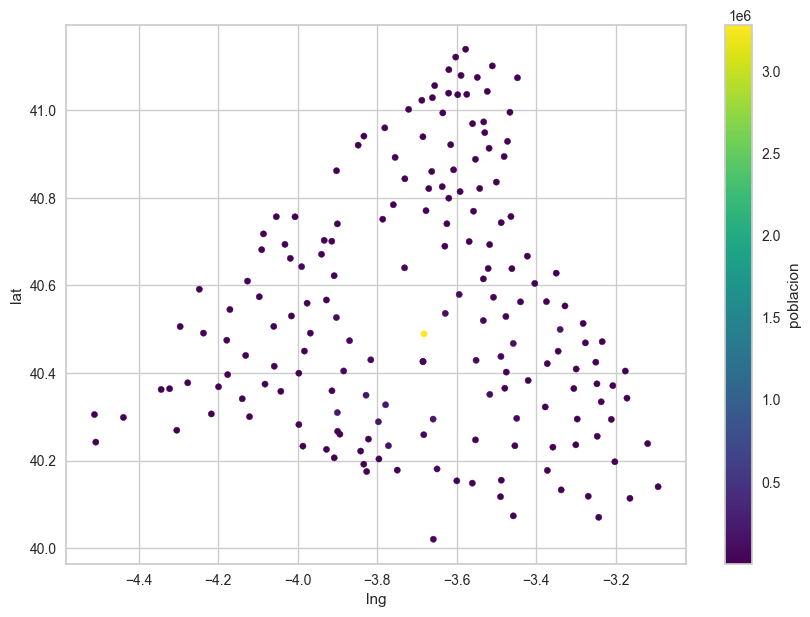

In [22]:
municipios.plot(kind='scatter', x='lng', y='lat', figsize=(10,7), c='poblacion',colormap='viridis')

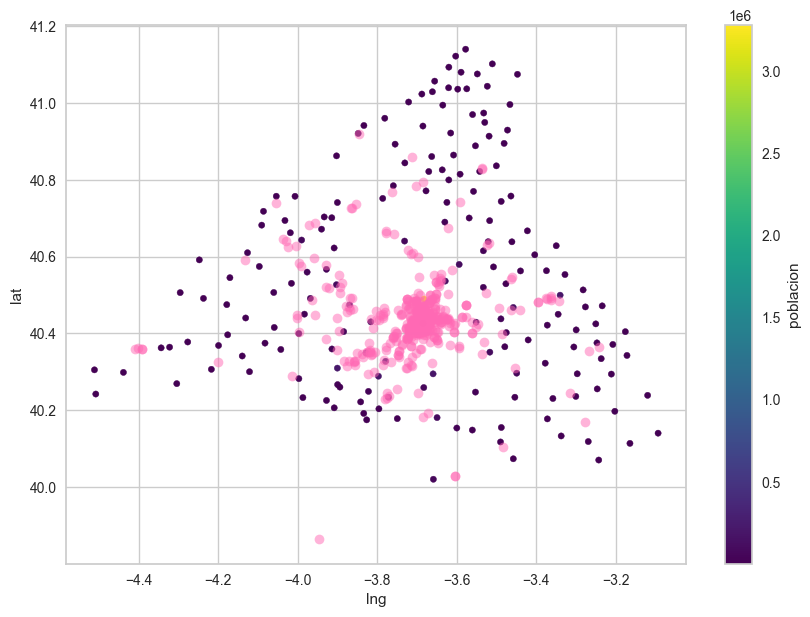

In [23]:
municipios.plot(kind='scatter', x='lng', y='lat', figsize=(10,7), c='poblacion',colormap='viridis')
plt.plot(*zip(*madrid_coords), 'o', c='hotpink', alpha=0.5)

In [114]:
def get_closest_nodes(node, nodes):
    nodes = [i for i in nodes if i.name != node.name]
    nodes = sorted(nodes, key=lambda x: euclidean_dist(node,x))
    return nodes[0]

In [207]:
main_nodes = []
for i in municipios.itertuples():
    node = Node.make(i.lng,i.lat, weight = i.poblacion)
    node.name = i.municipio
    main_nodes.append(node)

for i in main_nodes:
    b = get_closest_nodes(i, main_nodes)
    i.closest_nodes = euclidean_dist(i,b)
    i.directional = np.dot(i.loc, b.loc)/(abs(i)*abs(b))
    i.clase = 'main'
midpoint = [i for i in main_nodes if i.name == 'Madrid'][0]
sample = []
for i in main_nodes:
    sample.extend(normal_sample(n = ceil(i.weight/200), mean = i.loc, std = [i.closest_nodes/100, i.closest_nodes/100]))

In [215]:
def wealth_fn(x,a = 1,b=1):
    return 1/(b+a*x)

def euclidean_distance(a,b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def wealthy_city(pop_centers,midpoint,seed = SEED,rd=8,draw=True):
    s = 10
    mid_pop = 1000
    scaling_factor = 200
    spread_scaling_factor = 100
    density_scaling = 5
    population = [normal_sample(ceil(i.weight/200),i.loc,([i.closest_nodes/100, i.closest_nodes/100]),seed=seed) for i in pop_centers]
    
    pop = np.concatenate(population,axis=0)

    dist_to_mid = [euclidean_distance(i,midpoint.loc) for i in pop]


    population_wealth = np.concatenate([stats.lognorm.rvs(s,loc=0,scale=wealth_fn(i),size=1,random_state = SEED) for i in dist_to_mid])
    density = np.array([len([i for i in pop if euclidean_distance(j,i) < 0.01]) for j in pop])
    density_cost = density*density_scaling + population_wealth
    combined = np.hstack((pop,np.atleast_2d(density_cost).T))
    pop_rd = np.array(list(map(lambda x: [round(x[0],rd),round(x[1],rd), round(x[2],rd)],combined)))
    if draw:
        df = pd.DataFrame(pop_rd,columns=['x','y','wealth'])
        df.plot(kind='scatter',x='x',y='y',c='wealth',colormap='viridis',alpha=0.5)
    return pop_rd

In [216]:
wealthy_city(main_nodes,midpoint,seed=SEED,rd=8,draw=True)

In [204]:
secondary_nodes = []
for i in sample:
    node = Node.make(i[0],i[1])
    node.closest_nodes = i[2]
    node.directional = i[3]
    node.clase = 'secondary'
    secondary_nodes.append(node)

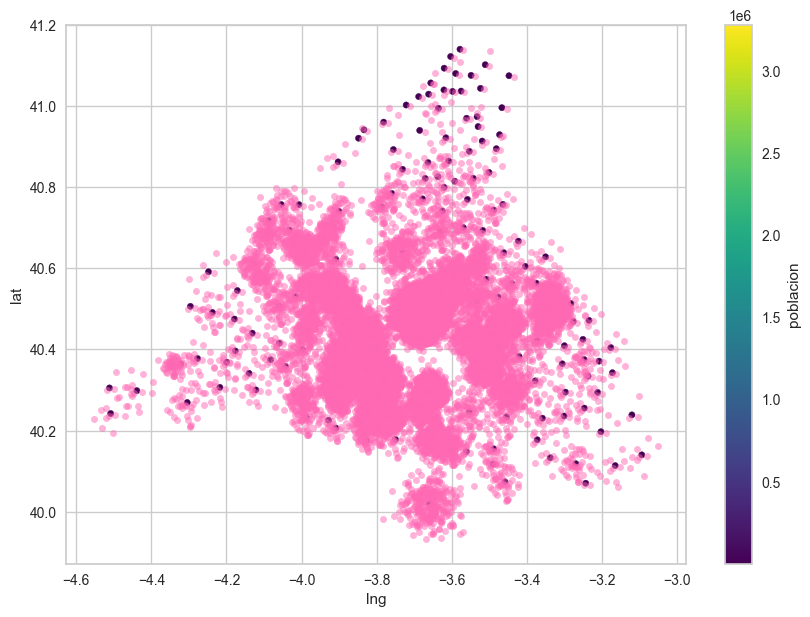

In [206]:

municipios.plot(kind='scatter', x='lng', y='lat', figsize=(10,7), c='poblacion',colormap='viridis')
plt.plot(*zip(*sample), '.', c='hotpink', alpha=0.5,markersize=10)